In [ ]:
# import zipfile
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('/content/boston.csv')

print(df1.head(5))

print(df1['SalePrice'].mean())

print(df1['SalePrice'].std())
# print(df1['SalePrice'].

coefficientOfVariation=df1['SalePrice'].std()/df1['SalePrice'].mean()
print(coefficientOfVariation)

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  ...  SaleType  SaleCondition SalePrice
0           0             0               8  ...        WD        Abnorml    129900
1           1             1              48  ...       New        Partial    113000
2           2             2              63  ...        WD         Normal    140000
3           3             3              68  ...        WD         Normal     80000
4           4             4              74  ...        WD         Normal    107400

[5 rows x 84 columns]
128225.30088495575
52650.58318492048
0.4106099406400207


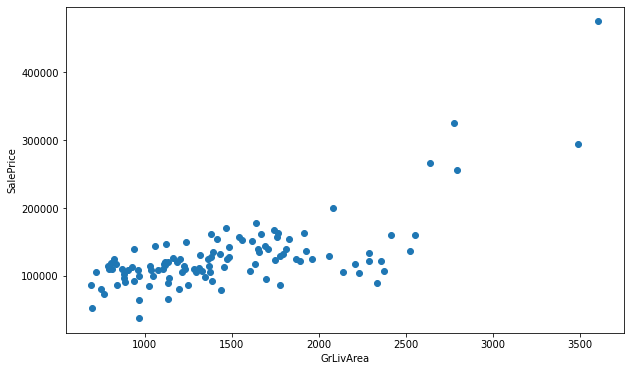

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df1['GrLivArea'], df1['SalePrice'])
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
plt.show()

In [ ]:
Q1 = df1['SalePrice'].quantile(0.25)
Q3 = df1['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

34100.0


In [ ]:
filtered = df1.query('(@Q1 - 1.5 * @IQR) <= SalePrice <= (@Q3 + 1.5 * @IQR)')

In [ ]:
# Ploting the result to check the difference
df_filtered=df1.join(filtered, rsuffix='_filtered')
df_filtered.head(5)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,...,CentralAir_filtered,Electrical_filtered,1stFlrSF_filtered,2ndFlrSF_filtered,LowQualFinSF_filtered,GrLivArea_filtered,BsmtFullBath_filtered,BsmtHalfBath_filtered,FullBath_filtered,HalfBath_filtered,BedroomAbvGr_filtered,KitchenAbvGr_filtered,KitchenQual_filtered,TotRmsAbvGrd_filtered,Functional_filtered,Fireplaces_filtered,FireplaceQu_filtered,GarageType_filtered,GarageYrBlt_filtered,GarageFinish_filtered,GarageCars_filtered,GarageArea_filtered,GarageQual_filtered,GarageCond_filtered,PavedDrive_filtered,WoodDeckSF_filtered,OpenPorchSF_filtered,EnclosedPorch_filtered,3SsnPorch_filtered,ScreenPorch_filtered,PoolArea_filtered,PoolQC_filtered,Fence_filtered,MiscFeature_filtered,MiscVal_filtered,MoSold_filtered,YrSold_filtered,SaleType_filtered,SaleCondition_filtered,SalePrice_filtered
0,0,0,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,...,Y,FuseF,1022.0,752.0,0.0,1774.0,0.0,0.0,2.0,0.0,2.0,2.0,TA,8.0,Min1,2.0,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90.0,0.0,205.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,4.0,2008.0,WD,Abnorml,129900.0
1,1,1,48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,...,Y,SBrkr,736.0,716.0,0.0,1452.0,0.0,0.0,2.0,0.0,2.0,3.0,TA,8.0,Typ,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0.0,0.0,102.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2009.0,New,Partial,113000.0
2,2,2,63,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,...,Y,SBrkr,902.0,808.0,0.0,1710.0,0.0,0.0,2.0,0.0,3.0,1.0,TA,9.0,Typ,0.0,NaN,Detchd,1990.0,Unf,2.0,480.0,TA,TA,Y,12.0,11.0,64.0,0.0,0.0,0.0,NaN,GdPrv,NaN,0.0,4.0,2010.0,WD,Normal,140000.0
3,3,3,68,69,30,RM,47.0,4608,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1Story,4,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,...,Y,SBrkr,747.0,0.0,0.0,747.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,4.0,Typ,0.0,NaN,Attchd,1945.0,Unf,1.0,220.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal,80000.0
4,4,4,74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,3,6,1915,1950,Gambrel,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,CBlock,Fa,TA,No,Unf,0,Unf,0,...,N,SBrkr,840.0,765.0,0.0,1605.0,0.0,0.0,2.0,0.0,3.0,2.0,TA,8.0,Typ,0.0,NaN,Detchd,1915.0,Unf,1.0,379.0,TA,TA,Y,0.0,0.0,202.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2010.0,WD,Normal,107400.0


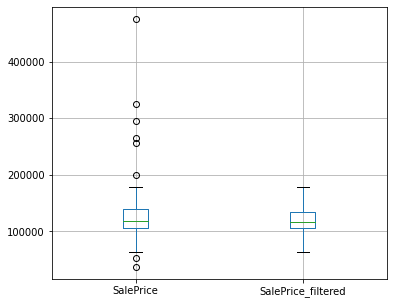

In [ ]:
df_filtered.boxplot(column=['SalePrice', 'SalePrice_filtered'],figsize=(6,5))

In [ ]:
import seaborn as sns #visualisation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


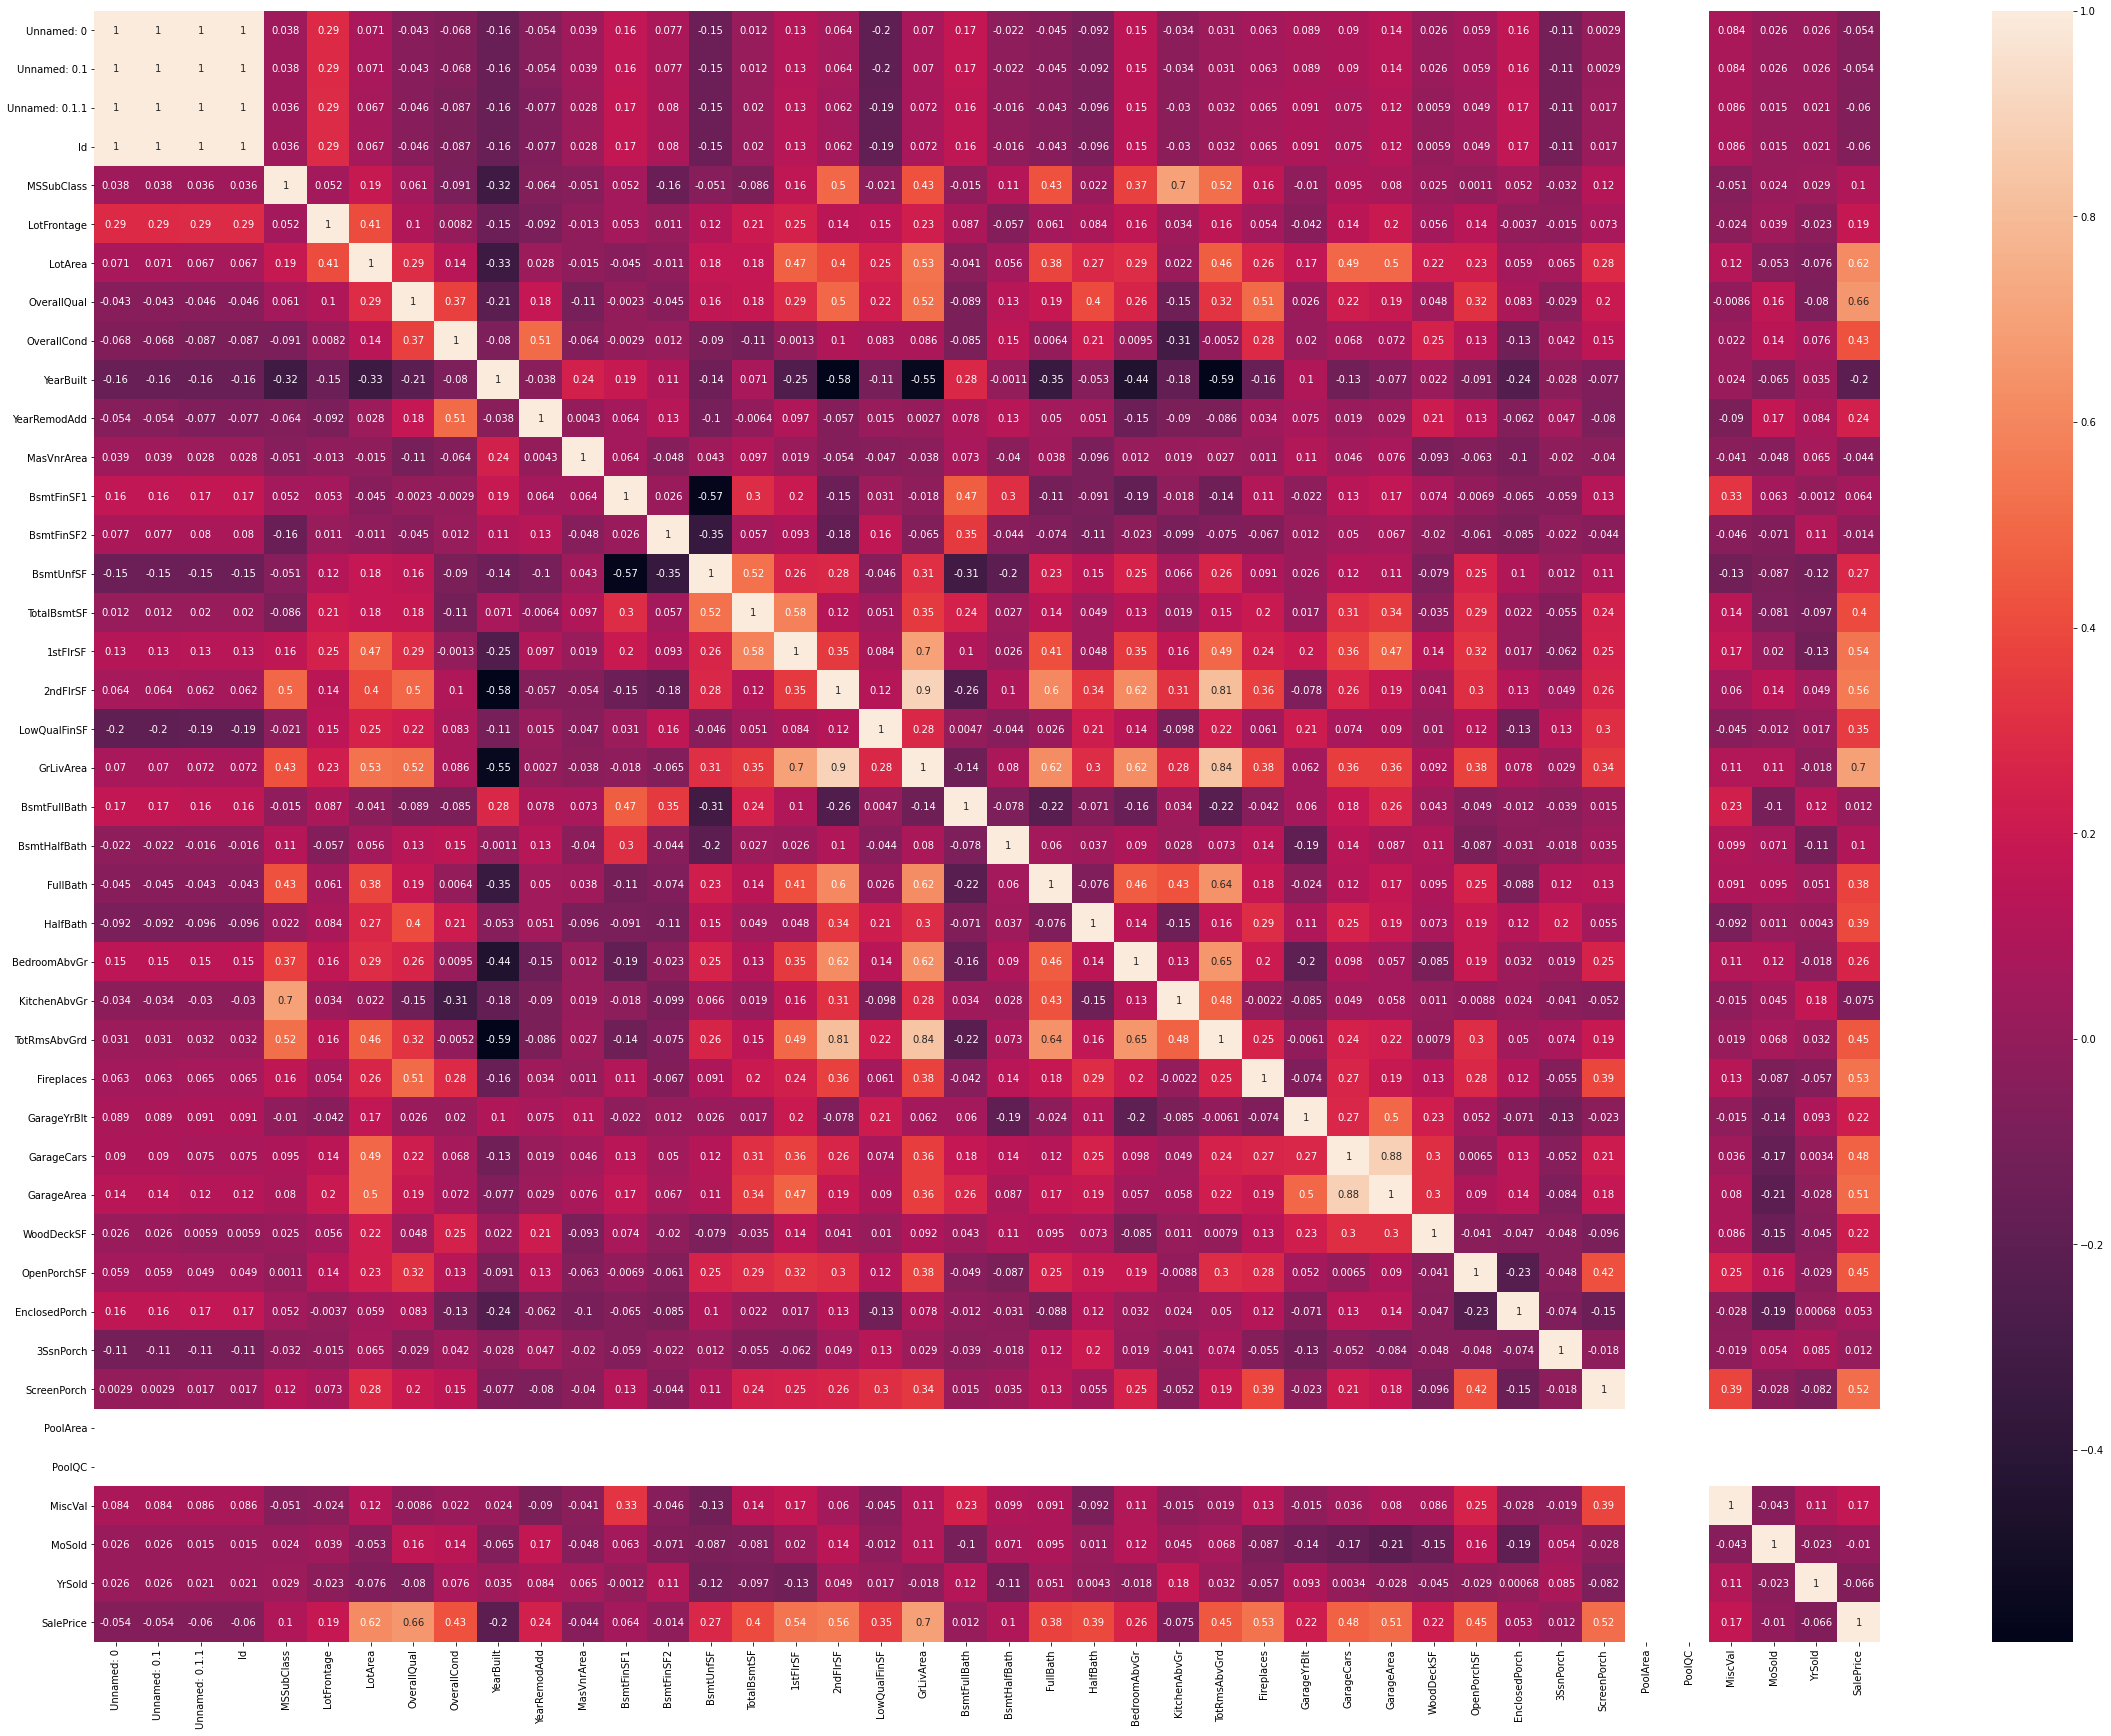

In [ ]:
plt.figure(figsize=(40,30))
c= df1.corr()
sns.heatmap(c,annot=True)


Descriptive analytics 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Descriptive data analytics (for report)

In [ ]:
df = pd.read_csv(
    '/content/sample (1).csv')
# first

print(df.head(5))

   Unnamed: 0        date  date_block_num  ...  item_price  item_cnt_day   shop_name
0       17061  27.01.2013               0  ...       349.0             1  east_amman
1       17062  02.01.2013               0  ...       399.0             1  east_amman
2       17063  03.01.2013               0  ...       399.0             1  east_amman
3       17064  04.01.2013               0  ...       399.0             1  east_amman
4       17065  05.01.2013               0  ...       399.0             1  east_amman

[5 rows x 8 columns]


In [ ]:
df['Sales'] = df['item_price']*df['item_cnt_day']
df.head(2)

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,Sales
0,17061,27.01.2013,0,27,22130,349.0,1,east_amman,349.0
1,17062,02.01.2013,0,27,22134,399.0,1,east_amman,399.0


In [ ]:
# second
# there are 34 months, so average monthly sales is total sales/number of months
print(df[['Sales']].sum())
sumation = df[['Sales']].sum()
monthly_sales = sumation/34
print("monthly sales equals", round(monthly_sales))


Sales    5.179605e+08
dtype: float64
monthly sales equals Sales    15234132.0
dtype: float64


In [ ]:
# bar chart representing sales
df_shop_sales =df.groupby(by=['shop_name']).sum()


[58605903.52988375, 68737617.82999846, 140632474.11979377, 98067453.79967798, 151917032.54956552]


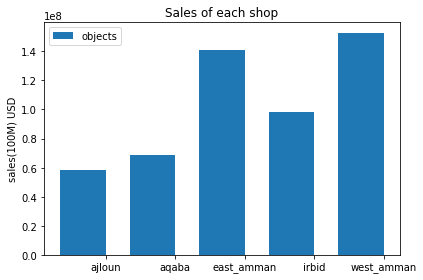

In [ ]:
# number 3
objects = ['ajloun','aqaba','east_amman','irbid','west_amman']
y_pos = np.arange(len(objects))
performance = (df_shop_sales['Sales']).tolist()
width=0.65
print(performance)

fig, ax = plt.subplots()
rects = ax.bar(y_pos - width/2, performance, width, label='objects')
ax.set_xticks(y_pos)
ax.set_xticklabels(objects)
ax.set_ylabel('sales(100M) USD')
ax.set_title('Sales of each shop')
ax.set_xticks(y_pos)
ax.set_xticklabels(objects)
ax.legend()

fig.tight_layout()

plt.show()
# plt.xticks(y_pos,performance)

# plt.show()

In [ ]:
# finding mean, median and midrange for question 4
print(df_shop_sales['Sales'].mean())
midrange_value = (performance[4]-performance[0])/2
print(midrange_value)
print(df_shop_sales['Sales'].median())

103592096.3657839
46655564.50984089
98067453.79967798


In [ ]:
# number 5
df_eastAmman= df[df['shop_name']=='east_amman']
df_items = df_eastAmman.groupby(by=['item_id']).sum()
df_items = df_items.reset_index()
df_items = df_items.sort_values(['item_cnt_day'],ascending= False)
df_items.head(1)


,item_id,Unnamed: 0,date_block_num,shop_id,item_price,item_cnt_day,Sales
10305,20949,1241981180,12388,19197,3554.982143,8265,41324.75


In [ ]:
# no. 7
print(df_items['item_cnt_day'].sum())

136657


In [ ]:
# ///////////////////////////# number 5

df_westAmman= df[df['shop_name']=='west_amman']
df_items = df_westAmman.groupby(by=['item_id']).sum()
df_items = df_items.reset_index()
df_items = df_items.sort_values(['item_cnt_day'],ascending= False)
df_items.head(1)

,item_id,Unnamed: 0,date_block_num,shop_id,item_price,item_cnt_day,Sales
11406,20949,1521529455,15475,35028,4169.944444,10514,52569.5


In [ ]:
# no. 7
print(df_items['item_cnt_day'].sum())

144934


In [ ]:
# ///////////////////////////# number 5

df_ajloun= df[df['shop_name']=='ajloun']
df_items = df_ajloun.groupby(by=['item_id']).sum()
df_items = df_items.reset_index()
df_items = df_items.sort_values(['item_cnt_day'],ascending= False)
df_items.head(1)

,item_id,Unnamed: 0,date_block_num,shop_id,item_price,item_cnt_day,Sales
10513,20949,1523042478,15395,46480,4149.5,3439,17194.0


In [ ]:
# no. 7
print(df_items['item_cnt_day'].sum())

78079


In [ ]:
# number 5

df_aqaba= df[df['shop_name']=='aqaba']
df_items = df_aqaba.groupby(by=['item_id']).sum()
df_items = df_items.reset_index()
df_items = df_items.sort_values(['item_cnt_day'],ascending= False)
df_items.head(1)

,item_id,Unnamed: 0,date_block_num,shop_id,item_price,item_cnt_day,Sales
7968,20949,1208661426,12187,38686,3335.0,2928,14640.0


In [ ]:
# no. 7
print(df_items['item_cnt_day'].sum())

81734


In [ ]:
# number 5

df_irbid= df[df['shop_name']=='irbid']
df_items = df_irbid.groupby(by=['item_id']).sum()
df_items = df_items.reset_index()
df_items = df_items.sort_values(['item_cnt_day'],ascending= False)
df_items.head(1)


,item_id,Unnamed: 0,date_block_num,shop_id,item_price,item_cnt_day,Sales
11307,20949,1362340766,13691,4626,3854.031524,3551,17752.22


In [ ]:
# no. 7
print(df_items['item_cnt_day'].sum())

100489


In [ ]:
# number 6
df_items = df.groupby(by=['item_id']).sum()
df_items = df_items.reset_index()
df_items = df_items.sort_values(['item_cnt_day'],ascending= False)
df_items.head(10)


,item_id,Unnamed: 0,date_block_num,shop_id,item_price,item_cnt_day,Sales
14591,20949,6857555305,69136,144017,1.906346e+04,28697,1.434805e+05
12196,17717,2877202794,29681,43727,1.530145e+06,2825,3.126862e+06
3351,5822,2441342560,24509,50217,1.506810e+06,2269,2.419813e+06
2065,3732,1226971754,11907,28680,2.198422e+06,2268,5.936759e+06
1488,2808,1214350368,11711,28675,9.780537e+05,1991,1.969726e+06
2067,3734,1333858994,13078,31816,2.315746e+06,1791,4.797132e+06
2064,3731,801379734,8687,10891,6.044173e+05,1603,3.164135e+06
3951,6675,1428291767,14219,26118,1.697159e+07,1523,3.318565e+07
2782,4870,1632359712,16210,41395,8.768644e+05,1452,1.302484e+06
897,1855,1337382534,13001,28607,7.331544e+05,1436,1.329138e+06


In [ ]:
df_for_items = df.drop_duplicates(subset=['item_id'])
df_for_items.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,Sales
0,17061,27.01.2013,0,27,22130,349.00,1,east_amman,349.00
1,17062,02.01.2013,0,27,22134,399.00,1,east_amman,399.00
10,17071,26.01.2013,0,27,22139,823.09,1,east_amman,823.09
11,17072,06.01.2013,0,27,22140,352.36,1,east_amman,352.36
12,17074,02.01.2013,0,27,22151,399.00,2,east_amman,798.00


In [ ]:
# no. 8
print(df_for_items['item_price'].mean())

831.249441562745


In [ ]:
# no. 9
print(df_for_items['item_price'].median())


399.0


In [ ]:
# no. 10
print(df_for_items['item_price'].std())

1658.6968148403287


In [ ]:
df_irbid_items = df[df['shop_name']=='irbid']
df_irbid_items = df_irbid_items.drop_duplicates(subset=['item_id'])
print(df_for_items['item_price'].mean()) # no. 11
print(df_for_items['item_price'].median()) # no. 12

831.249441562745
399.0


In [ ]:
df_ajloun_items = df[df['shop_name']=='ajloun']
df_ajloun_items = df_ajloun_items.drop_duplicates(subset=['item_id'])
print(df_for_items['item_price'].mean()) # no. 11
print(df_for_items['item_price'].median()) # no. 12

831.249441562745
399.0


In [ ]:
df_aqaba_items = df[df['shop_name']=='aqaba']
df_aqaba_items = df_aqaba_items.drop_duplicates(subset=['item_id'])

print(df_for_items['item_price'].mean()) # no. 11
print(df_for_items['item_price'].median()) # no. 12

831.249441562745
399.0


In [ ]:
df_west_amman_items = df[df['shop_name']=='west_amman']
df_west_amman_items = df_west_amman_items.drop_duplicates(subset=['item_id'])

print(df_for_items['item_price'].mean()) # no. 11
print(df_for_items['item_price'].median()) # no. 12

831.249441562745
399.0


In [ ]:
df_east_amman_items = df[df['shop_name']=='east_amman']
df_east_amman_items = df_east_amman_items.drop_duplicates(subset=['item_id'])

print(df_for_items['item_price'].mean()) # no. 11
print(df_for_items['item_price'].median()) # no. 12

831.249441562745
399.0


In [ ]:
df_irbid= df[df['shop_name']=='irbid']
dummies = pd.get_dummies(df_irbid['date_block_num'], prefix='m_')
df_irbid = pd.concat([df_irbid,dummies], axis=1)
print(df_irbid)

        Unnamed: 0        date  date_block_num  ...  m__31  m__32  m__33
4696         31260  03.01.2013               0  ...      0      0      0
4697         31261  09.01.2013               0  ...      0      0      0
4698         31262  12.01.2013               0  ...      0      0      0
4699         31263  14.01.2013               0  ...      0      0      0
4700         31264  19.01.2013               0  ...      0      0      0
...            ...         ...             ...  ...    ...    ...    ...
438291     2920804  27.10.2015              33  ...      0      0      1
438292     2920805  11.10.2015              33  ...      0      0      1
438293     2920806  22.10.2015              33  ...      0      0      1
438294     2920807  16.10.2015              33  ...      0      0      1
438295     2920808  10.10.2015              33  ...      0      0      1

[82663 rows x 43 columns]


In [ ]:
mylist = []
sales_m0=df_irbid[df_irbid['m__0']==1]['Sales'].sum()
print(sales_m0)
mylist.append(sales_m0)
sales_m1=df_irbid[df_irbid['m__1']==1]['Sales'].sum()
print(sales_m1)
mylist.append(sales_m1)
sales_m2=df_irbid[df_irbid['m__2']==1]['Sales'].sum()
print(sales_m2)
mylist.append(sales_m2)
sales_m3=df_irbid[df_irbid['m__3']==1]['Sales'].sum()
print(sales_m3)
mylist.append(sales_m3)
sales_m4=df_irbid[df_irbid['m__4']==1]['Sales'].sum()
print(sales_m4)
mylist.append(sales_m4)
sales_m5=df_irbid[df_irbid['m__5']==1]['Sales'].sum()
print(sales_m5)
mylist.append(sales_m5)
sales_m6=df_irbid[df_irbid['m__6']==1]['Sales'].sum()
print(sales_m6)
mylist.append(sales_m6)
sales_m7=df_irbid[df_irbid['m__7']==1]['Sales'].sum()
print(sales_m7)
mylist.append(sales_m7)
sales_m8=df_irbid[df_irbid['m__8']==1]['Sales'].sum()
print(sales_m8)
mylist.append(sales_m8)
sales_m9=df_irbid[df_irbid['m__9']==1]['Sales'].sum()
print(sales_m9)
mylist.append(sales_m9)
sales_m10=df_irbid[df_irbid['m__10']==1]['Sales'].sum()
print(sales_m10)
mylist.append(sales_m10)
sales_m11=df_irbid[df_irbid['m__11']==1]['Sales'].sum()
print(sales_m11)
mylist.append(sales_m11)
print(mylist)

2743015.0
2919699.9999923003
3407396.9999897
2097684.0000010002
1912972.9999956
2558387.0000333013
2111443.0000001
2321313.9999997998
4008009.4299161998
3294513.499981301
4711448.9997616
5769901.9999927
[2743015.0, 2919699.9999923003, 3407396.9999897, 2097684.0000010002, 1912972.9999956, 2558387.0000333013, 2111443.0000001, 2321313.9999997998, 4008009.4299161998, 3294513.499981301, 4711448.9997616, 5769901.9999927]


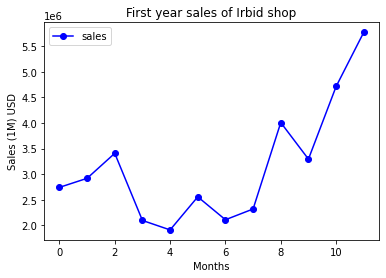

In [ ]:

plt.plot(mylist,'b-o', label = 'sales' )
plt.ylabel('Sales (1M) USD')
plt.xlabel('Months')
plt.title('First year sales of Irbid shop')
# plt.bar(y_pos,performance, label = 'sales')
plt.legend()
plt.show()

In [ ]:
sales_m12=df_irbid[df_irbid['m__12']==1]['Sales'].sum()
mylist.append(sales_m12)

In [ ]:
sales_list = [[]]

In [ ]:
df_eastAmman = df[df['shop_name']=='east_amman']
df_eastAmman.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,Sales
0,17061,27.01.2013,0,27,22130,349.0,1,east_amman,349.0
1,17062,02.01.2013,0,27,22134,399.0,1,east_amman,399.0
2,17063,03.01.2013,0,27,22134,399.0,1,east_amman,399.0
3,17064,04.01.2013,0,27,22134,399.0,1,east_amman,399.0
4,17065,05.01.2013,0,27,22134,399.0,1,east_amman,399.0


In [ ]:
df_all_sales_east_amman = df_eastAmman.groupby(by=['date_block_num']).sum()
df_all_sales_east_amman = df_all_sales_east_amman.reset_index()
df_all_sales_east_amman = df_all_sales_east_amman.sort_values(['date_block_num'])
df_all_sales_east_amman.head(34)
sales_list.append(df_all_sales_east_amman['Sales'])

In [ ]:
df_westAmman = df[df['shop_name']=='west_amman']
df_westAmman.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,Sales
10930,91389,01.01.2013,0,42,16920,547.5,1,west_amman,547.5
10931,91390,25.01.2013,0,42,16919,399.0,1,west_amman,399.0
10932,91391,17.01.2013,0,42,16919,399.0,1,west_amman,399.0
10933,91392,18.01.2013,0,42,16915,149.0,1,west_amman,149.0
10934,91393,26.01.2013,0,42,16894,149.0,1,west_amman,149.0


In [ ]:
df_all_sales_west_amman = df_westAmman.groupby(by=['date_block_num']).sum()
df_all_sales_west_amman = df_all_sales_west_amman.reset_index()
df_all_sales_west_amman = df_all_sales_west_amman.sort_values(['date_block_num'])
df_all_sales_west_amman.head(34)
sales_list.append(df_all_sales_west_amman['Sales'])

In [ ]:
df_irbid= df[df['shop_name']=='irbid']
df_irbid.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,Sales
4696,31260,03.01.2013,0,6,32,349.0,1,irbid,349.0
4697,31261,09.01.2013,0,6,32,349.0,1,irbid,349.0
4698,31262,12.01.2013,0,6,32,349.0,1,irbid,349.0
4699,31263,14.01.2013,0,6,32,349.0,3,irbid,1047.0
4700,31264,19.01.2013,0,6,32,349.0,1,irbid,349.0


In [ ]:
df_all_sales_irbid = df_irbid.groupby(by=['date_block_num']).sum()
df_all_sales_irbid = df_all_sales_irbid.reset_index()
df_all_sales_irbid = df_all_sales_irbid.sort_values(['date_block_num'])
df_all_sales_irbid.head(34)
sales_list.append(df_all_sales_irbid['Sales'])

In [ ]:
df_ajloun = df[df['shop_name']=='ajloun']
df_ajloun.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,Sales
7950,74030,17.01.2013,0,56,1893,1999.0,1,ajloun,1999.0
7951,74031,02.01.2013,0,56,1894,598.5,1,ajloun,598.5
7952,74032,26.01.2013,0,56,1904,249.0,1,ajloun,249.0
7953,74033,03.01.2013,0,56,1905,249.0,3,ajloun,747.0
7954,74034,07.01.2013,0,56,1905,249.0,1,ajloun,249.0


In [ ]:
df_all_sales_ajloun = df_ajloun.groupby(by=['date_block_num']).sum()
df_all_sales_ajloun = df_all_sales_ajloun.reset_index()
df_all_sales_ajloun = df_all_sales_ajloun.sort_values(['date_block_num'])
df_all_sales_ajloun.head(34)
sales_list.append(df_all_sales_ajloun['Sales'])

In [ ]:
df_aqaba = df[df['shop_name']=='aqaba']
df_aqaba.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,Sales
41678,332032,15.03.2013,2,58,8985,349.0,1,aqaba,349.0
41679,332033,16.03.2013,2,58,8980,149.0,1,aqaba,149.0
41680,332034,11.03.2013,2,58,8965,149.0,1,aqaba,149.0
41681,332035,02.03.2013,2,58,8965,149.0,1,aqaba,149.0
41682,332036,02.03.2013,2,58,8963,499.0,1,aqaba,499.0


In [ ]:
df_all_sales_aqaba = df_aqaba.groupby(by=['date_block_num']).sum()
df_all_sales_aqaba = df_all_sales_aqaba.reset_index()
df_all_sales_aqaba = df_all_sales_aqaba.sort_values(['date_block_num'])
df_all_sales_aqaba.head(34)
sales_list.append(df_all_sales_aqaba['Sales'])

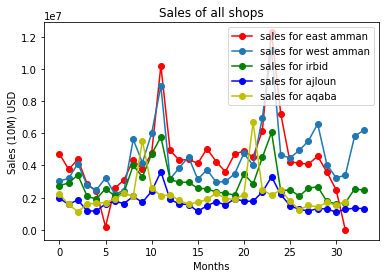

In [ ]:
plt.plot(sales_list[1],'r-o', label = 'sales for east amman')
plt.plot(sales_list[2],'-o', label = 'sales for west amman')
plt.plot(sales_list[3],'g-o', label = 'sales for irbid')
plt.plot(sales_list[4],'b-o', label = 'sales for ajloun')
plt.plot(sales_list[5],'y-o', label = 'sales for aqaba')                         
plt.ylabel('Sales (10M) USD')
plt.xlabel('Months')
plt.title('Sales of all shops')
# plt.bar(y_pos,performance, label = 'sales')
plt.legend()
plt.show()

**Predictive part**

---



In [ ]:
eastAmman_list = []

eastAmman_list.append(df_all_sales_east_amman['Sales'])
# print(eastAmman_list)

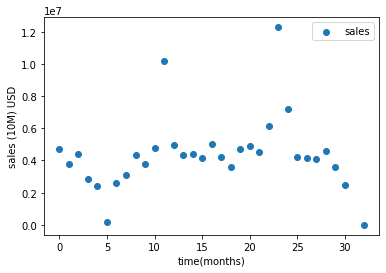

In [ ]:

y_axis = eastAmman_list
X_axis = df_eastAmman['date_block_num'].drop_duplicates()
# print(X_axis)
plt.xticks()
plt.ylabel('sales (10M) USD')
plt.xlabel('time(months)')
plt.scatter(X_axis,y_axis, label = 'sales')
plt.legend()
plt.show()


In [ ]:
westAmman_list = []
westAmman_list.append(df_all_sales_west_amman['Sales'])
print(westAmman_list)

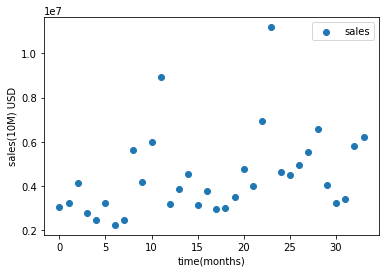

In [ ]:

y_axis = westAmman_list
X_axis = df_westAmman['date_block_num'].drop_duplicates()

plt.xticks()
plt.xlabel('time(months)')
plt.ylabel('sales(10M) USD')
plt.scatter(X_axis,y_axis, label = 'sales')
plt.legend()
plt.show()

In [ ]:
# sales_m12=df_irbid[df_irbid['m__12']==1]['Sales'].sum()
# mylist.append(sales_m12)
print(mylist)

[2743015.0, 2919699.9999923003, 3407396.9999897, 2097684.0000010002, 1912972.9999956, 2558387.0000333013, 2111443.0000001, 2321313.9999997998, 4008009.4299161998, 3294513.499981301, 4711448.9997616, 5769901.9999927, 3130598.6599996]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
import math

In [ ]:
df_irbid = df_irbid.groupby(by=['date_block_num'] ).sum()
df_irbid = df_irbid.reset_index()
df_irbid = df_irbid.sort_values(['date_block_num'])
# print(df_irbid)
df_irbid.head(13)
# print(mylist)

,date_block_num,Unnamed: 0,shop_id,item_id,item_price,item_cnt_day,Sales
0,0,116223736,19524,31742677,2.459155e+06,3686,2.743015e+06
1,1,568452323,19974,30934007,2.339551e+06,4007,2.919700e+06
2,2,1052620760,21306,33671402,2.535101e+06,4519,3.407397e+06
3,3,1029306116,16524,26875548,1.870934e+06,3168,2.097684e+06
4,4,1399966425,15894,26160520,1.663281e+06,3022,1.912973e+06
5,5,1807181310,18726,31661478,1.985811e+06,3847,2.558387e+06
6,6,2002896897,17814,29620104,1.892025e+06,3360,2.111443e+06
7,7,2540278149,18528,30507063,2.028972e+06,3702,2.321314e+06
8,8,2673484674,18408,29869443,2.349342e+06,4208,4.008009e+06
9,9,2754977052,16632,27976544,2.166137e+06,3675,3.294513e+06


In [ ]:
df_irbid.corr().head(8)

,date_block_num,Unnamed: 0,shop_id,item_id,item_price,item_cnt_day,Sales
date_block_num,1.000000,0.717237,-0.812203,-0.789426,-0.197047,-0.790365,-0.172044
Unnamed: 0,0.717237,1.000000,-0.270343,-0.225776,0.416831,-0.252213,0.373782
shop_id,-0.812203,-0.270343,1.000000,0.996117,0.689459,0.975833,0.603403
item_id,-0.789426,-0.225776,0.996117,1.000000,0.707536,0.971851,0.614884
item_price,-0.197047,0.416831,0.689459,0.707536,1.000000,0.684191,0.889618
item_cnt_day,-0.790365,-0.252213,0.975833,0.971851,0.684191,1.000000,0.688124
Sales,-0.172044,0.373782,0.603403,0.614884,0.889618,0.688124,1.000000


In [ ]:
# number 3

# # print(mylist)

# X = df_irbid[['item_cnt_day','date_block_num']].head(13)
# y = pd.DataFrame(mylist)

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
# # print(y)
# # print(X)


# model = LinearRegression()
# model.fit(X_train, y_train)
# prediction = model.predict(X_test)
# training_predictions = model.predict(X_train)

# print(prediction)
# # print('prediction of next months sales is', prediction[[12]])
# # print('actual sales of the same month = ',mylist[12])
# # difference = mylist[12]-prediction[[12]]
# # print('difference between actual sales and predicted sales = ',difference)

# print(math.sqrt(mean_squared_error(y_train,training_predictions))) #training
# print(r2_score(y_train,training_predictions))

# print(math.sqrt(mean_squared_error(y_test,prediction))) #testing
# print(r2_score(y_test,prediction))

# print(recall_score(y,prediction))
# print(precision_score(y_test,prediction))
# print(accuracy_score(y_test,prediction))



In [ ]:
degree = 2
# I left degree equal to 2 because I felt like 3 will be over-fit
features = PolynomialFeatures(degree = degree)
X = df_irbid[['item_price']].head(13)

y = pd.DataFrame(mylist)

X_poly = features.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X,y)
prediction = model.predict(X)

# print(prediction)
# print(y)

print(math.sqrt(mean_squared_error(y,prediction))) #testing
print(r2_score(y,prediction))


610328.2999834028
0.6792447887379776


In [ ]:
model.coef_


array([[1.36789072]])

In [ ]:
# plt.scatter(y, prediction)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')

In [ ]:
print('prediction of next months sales is', prediction[[12]])
print('actual sales of the same month = ',mylist[12])
difference = mylist[12]-prediction[[12]]
print('difference between actual sales and predicted sales = ',difference)

prediction of next months sales is [[3653875.86673635]]
actual sales of the same month =  3130598.6599996
difference between actual sales and predicted sales =  [[-523277.20673675]]


PREDICTIVE PART C

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
df = pd.read_csv('/content/heart 2.csv')
X = df[['age']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

model_1 = LogisticRegression()

model_1.fit(X_train, y_train)
prediction2 = model_1.predict(X_test)

print(accuracy_score(y_test, prediction2))
print(precision_score(y_test, prediction2))

0.6065573770491803
0.5813953488372093


In [ ]:
dummies = pd.get_dummies(df['cp'], prefix='cp')
df = pd.concat([df, dummies], axis=1)
X = df[['age', 'cp_1', 'cp_3', 'cp_2', 'sex']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
model_1 = LogisticRegression()

model_1.fit(X_train, y_train)
prediction2 = model_1.predict(X_test)
print(accuracy_score(y_test, prediction2))
print(precision_score(y_test, prediction2))

0.7213114754098361
0.7058823529411765
